목적 : 가위바위보 분류기 만들기

In [ ]:
# 라이브러리 버전을 확인
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.8.2
1.21.6


In [ ]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [ ]:
# 이미지 사이즈 변경
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/AIFFEL/E-05/data_set/rock_scissor_paper 2/scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1006  images to be resized.
1006  images resized.
가위 이미지 resize 완료!


In [ ]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/AIFFEL/E-05/data_set/rock_scissor_paper 2/rock'

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

1006  images to be resized.
1006  images resized.
바위 이미지 resize 완료!


In [ ]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/AIFFEL/E-05/data_set/rock_scissor_paper 2/paper'

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

1006  images to be resized.
1006  images resized.
보 이미지 resize 완료!


In [ ]:
# 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수 만들기
import numpy as np

def load_data(img_path, number_of_data=3018):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/AIFFEL/E-05/data_set/rock_scissor_paper 2'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3018 입니다.
x_train shape: (3018, 28, 28, 3)
y_train shape: (3018,)


라벨:  0


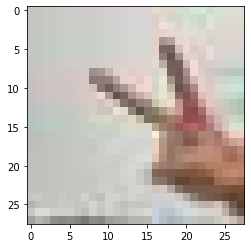

In [ ]:
# train 이미지 확인
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [ ]:
# 가위바위보를 인식하는 딥러닝 네트워크를 설계
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

In [ ]:
# 딥러닝 네트워크 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
95/95 [==============================] - 2s 20ms/step - loss: 2.3529 - accuracy: 0.5842
Epoch 2/10
95/95 [==============================] - 2s 21ms/step - loss: 0.2572 - accuracy: 0.9241
Epoch 3/10
95/95 [==============================] - 2s 21ms/step - loss: 0.0990 - accuracy: 0.9742
Epoch 4/10
95/95 [==============================] - 2s 20ms/step - loss: 0.0403 - accuracy: 0.9934
Epoch 5/10
95/95 [==============================] - 2s 21ms/step - loss: 0.0182 - accuracy: 0.9987
Epoch 6/10
95/95 [==============================] - 2s 20ms/step - loss: 0.0252 - accuracy: 0.9947
Epoch 7/10
95/95 [==============================] - 2s 20ms/step - loss: 0.0082 - accuracy: 0.9993
Epoch 8/10
95/95 [==============================] - 2s 20ms/step - loss: 0.0059 - accuracy: 0.9997
Epoch 9/10
95/95 [==============================] - 2s 19ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 10/10
95/95 [==============================] - 2s 19ms/step - loss: 0.0017 - accuracy: 1.0000


In [ ]:
# test 데이터 resize
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/AIFFEL/E-05/data_set/rock_scissor_paper 2/test/scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/AIFFEL/E-05/data_set/rock_scissor_paper 2/test/rock'

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/AIFFEL/E-05/data_set/rock_scissor_paper 2/test/paper'

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

120  images to be resized.
120  images resized.
가위 이미지 resize 완료!
120  images to be resized.
120  images resized.
바위 이미지 resize 완료!
120  images to be resized.
120  images resized.
보 이미지 resize 완료!


In [ ]:
# test 데이터 만들기

image_dir_path = '/content/drive/MyDrive/AIFFEL/E-05/data_set/rock_scissor_paper 2/test'
(x_test, y_test)=load_data(image_dir_path, number_of_data=360)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 360 입니다.
x_test shape: (360, 28, 28, 3)
y_test shape: (360,)


라벨:  0


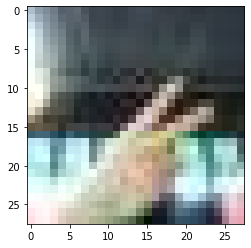

In [ ]:
# test 데이터 확인
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [ ]:
# 위에서 훈련시킨 model을 사용하여 test_accuracy를 측정
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

12/12 [==============================] - 0s 10ms/step - loss: 3.1507 - accuracy: 0.7111
## evaluation loss and_metrics ##
[3.150663137435913, 0.7111111283302307]


- 진행과정
  - 처음엔 내 데이터를 train 데이터로 하고 재민님 데이터를 test 데이터로 지정하여 진행
  - 0.4정도 나옴
  - n_channel_1, n_channel_2, n_dense, epoch를 조정하며 진행
  - 그래도 0.5정도 0.6을 못넘음
  - 그래서 '내 데이터 + 재민님 데이터 + 준영님 데이터'를 train 데이터로 동교님 데이터를 test 데이터로 사용
  - 따로 하이퍼파라미터를 조정하지 않았는데 0.6이 나옴
  - 하이퍼파라미터를 조정해봤지만 오히려 정확도가 떨어짐
  - 다시 원래 하이퍼파라미터로 진행해보니 갑자기 정확도가 0.71이 나옴

- 회고
  - 중간 중간 경로 문제라던가 입력값을 잘못 줘서 생긴 에러가 많았음.
  - 내 데이터로만 학습하고 재민님 데이터로 테스트 할 땐 정확도가 0.6을 못 넘었는데 내 데이터 + 재민님 데이터 + 준영님 데이터로 학습하고 동교님 데이터로 테스트하니 0.6이 넘음
  - 아마 학습할 데이터가 많아져서 정확도가 올라간듯..?
  - n_channel_1, n_channel_2, n_dense, epoch를 조정해봤지만 오히려 더 떨어짐 어떻게 조정하는지 모르겠음.
  - optimizer도 다른 걸로 바꿔봤지만 별 차이 없었음.
  - 학습시킬 때의 정확도가 항상 8정도 부턴 1.00이 나옴.
  - 과적합아닌가?? 근데 테스트해보면 정확도가 0.6이 넘음.
  - 어떻게 된건지 모르겠음